In [4]:
import pandas as pd

# Load the dataset
file_path = r"D:\\colabrative filtering\\archive (1)\\styles.csv"

try:
    # Using deprecated parameters for older pandas versions to handle bad lines
    data = pd.read_csv(file_path, quotechar='"', error_bad_lines=False, warn_bad_lines=False)
except Exception as e:
    data = pd.DataFrame()  # Create an empty DataFrame as a fallback

# Display first few rows to verify
print(data.head())


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [5]:
# Display basic information about the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [6]:
# Check for null values
print("\nNull Values in Each Column:")
print(data.isnull().sum())


Null Values in Each Column:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [10]:
print("\nAvailable columns in the dataset:")
print(data.columns)


Available columns in the dataset:
Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [7]:
# Display unique counts for each column
print("\nUnique Counts for Each Column:")
print(data.nunique())


Unique Counts for Each Column:
id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

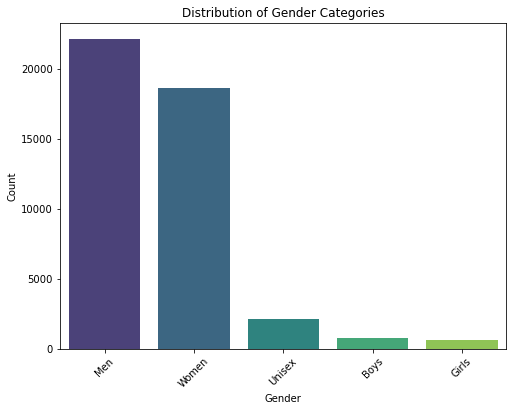

In [12]:
# Data Visualization
# Plot distribution of genders
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', order=data['gender'].value_counts().index, palette='viridis')
plt.title('Distribution of Gender Categories')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

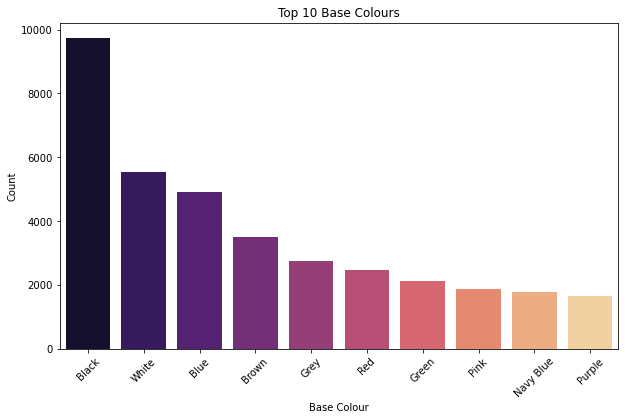

In [13]:
# Plot baseColour distribution
plt.figure(figsize=(10, 6))
base_colour_counts = data['baseColour'].value_counts()[:10]
sns.barplot(x=base_colour_counts.index, y=base_colour_counts.values, palette='magma')
plt.title('Top 10 Base Colours')
plt.xlabel('Base Colour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

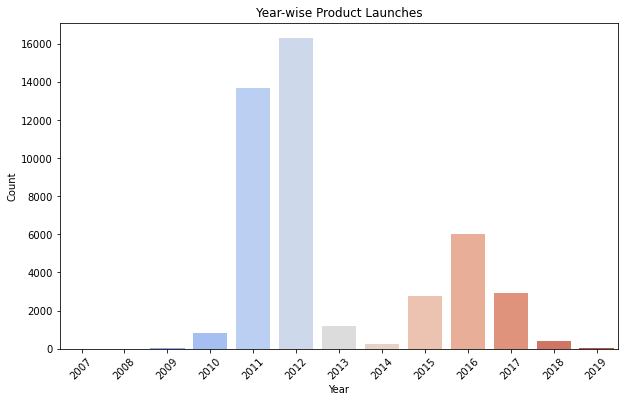

In [14]:
# Plot year-wise product launches
if 'year' in data.columns:
    plt.figure(figsize=(10, 6))
    data['year'] = data['year'].astype(int, errors='ignore')
    sns.countplot(data=data, x='year', palette='coolwarm')
    plt.title('Year-wise Product Launches')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

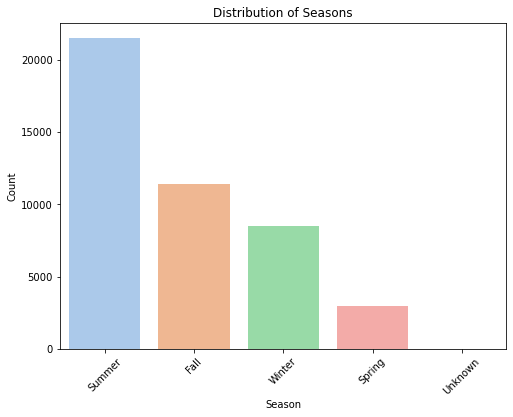

In [15]:
# Plot season distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='season', order=data['season'].value_counts().index, palette='pastel')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

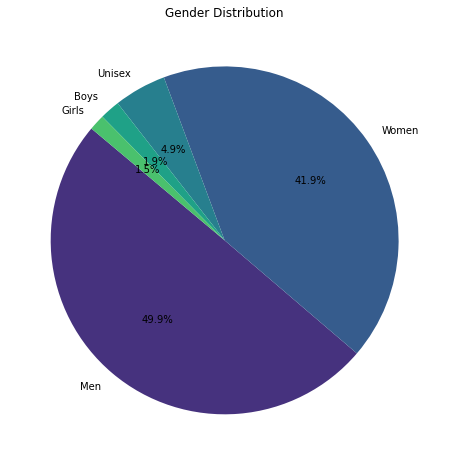

In [16]:
# Pie chart for gender distribution
plt.figure(figsize=(8, 8))
gender_counts = data['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Gender Distribution')
plt.show()

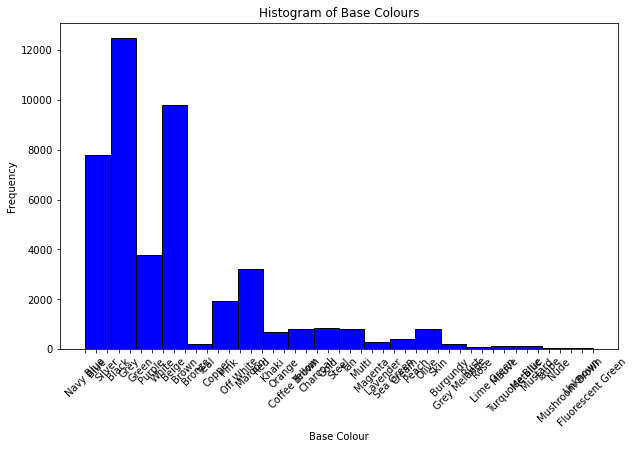

In [17]:
# Histogram for baseColour counts
plt.figure(figsize=(10, 6))
plt.hist(data['baseColour'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Base Colours')
plt.xlabel('Base Colour')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

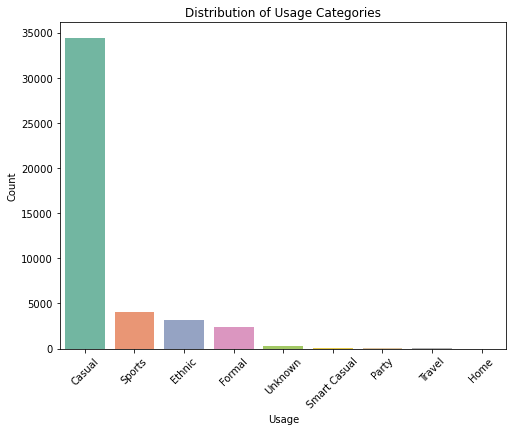

In [18]:
# Count plot for usage column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='usage', order=data['usage'].value_counts().index, palette='Set2')
plt.title('Distribution of Usage Categories')
plt.xlabel('Usage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

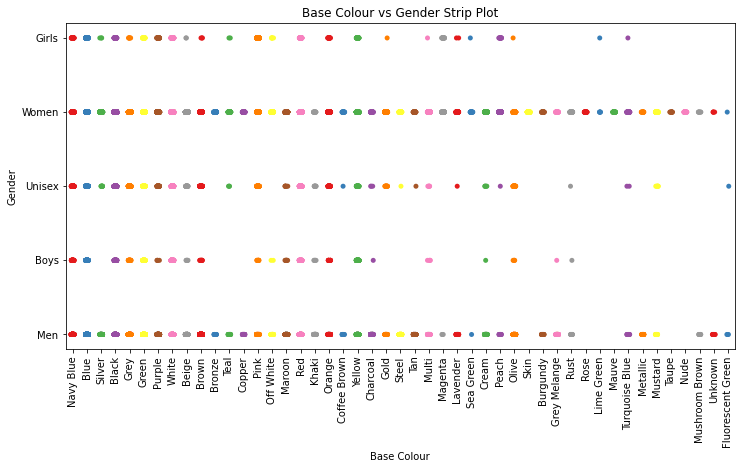

In [19]:
# Strip plot for baseColour vs gender
plt.figure(figsize=(12, 6))
sns.stripplot(data=data, x='baseColour', y='gender', jitter=True, palette='Set1')
plt.title('Base Colour vs Gender Strip Plot')
plt.xlabel('Base Colour')
plt.ylabel('Gender')
plt.xticks(rotation=90)
plt.show()

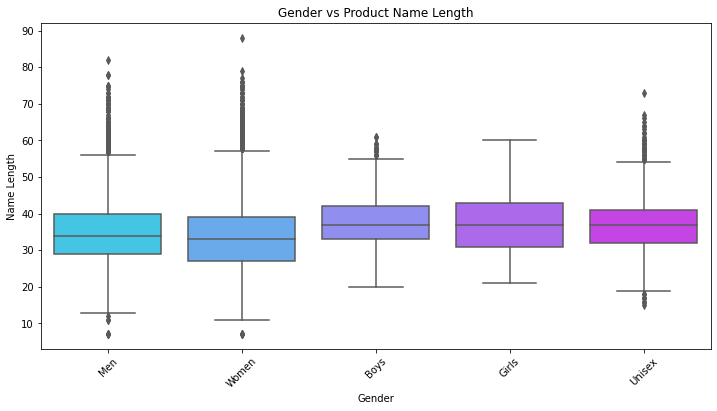

In [20]:
# Boxplot for gender vs productDisplayName length
if 'productDisplayName' in data.columns:
    data['name_length'] = data['productDisplayName'].apply(lambda x: len(str(x)))
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='gender', y='name_length', palette='cool')
    plt.title('Gender vs Product Name Length')
    plt.xlabel('Gender')
    plt.ylabel('Name Length')
    plt.xticks(rotation=45)
    plt.show()

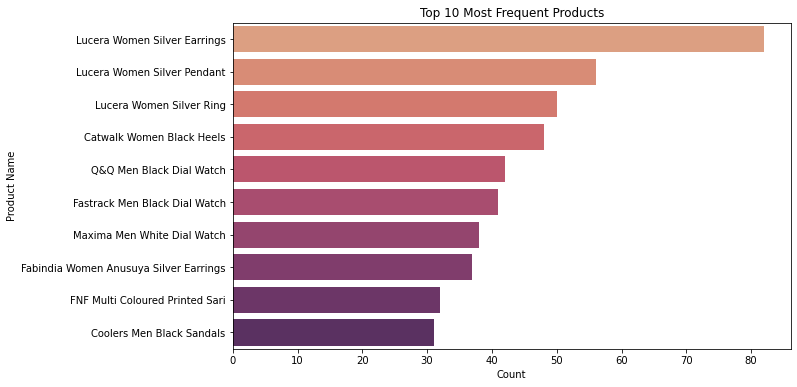

In [21]:
# Bar plot for top 10 products by frequency
plt.figure(figsize=(10, 6))
product_counts = data['productDisplayName'].value_counts()[:10]
sns.barplot(x=product_counts.values, y=product_counts.index, palette='flare')
plt.title('Top 10 Most Frequent Products')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

Dimension Categories Count: {'Low Dimension': 5000}

Sample Images for Dimension Categories:

Category: Low Dimension
ID: 15970, Dimensions: 60x80


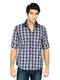

ID: 39386, Dimensions: 60x80


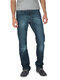

ID: 59263, Dimensions: 60x80


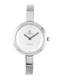

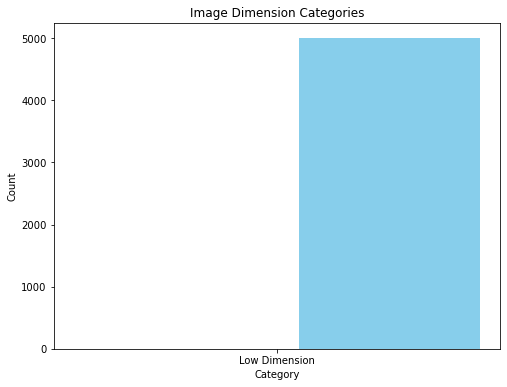

In [9]:
from concurrent.futures import ThreadPoolExecutor

# Analyze Dimension Categories
def analyze_dimensions(results):
    valid_results = [r for r in results if r is not None]
    categories = [r["dimension_category"] for r in valid_results]

    # Count each category
    category_counts = {category: categories.count(category) for category in set(categories)}
    print("Dimension Categories Count:", category_counts)

    # Display example images for each category
    print("\nSample Images for Dimension Categories:")
    for category in set(categories):
        category_samples = [r for r in valid_results if r["dimension_category"] == category][:3]
        print(f"\nCategory: {category}")
        for result in category_samples:
            print(f"ID: {result['id']}, Dimensions: {result['width']}x{result['height']}")
            with Image.open(result["image_path"]) as img:
                display(img)

    # Plot distribution
    plt.figure(figsize=(8, 6))
    plt.hist(categories, bins=2, color="skyblue", rwidth=0.8)
    plt.title("Image Dimension Categories")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

if __name__ == "__main__":
    with ThreadPoolExecutor(max_workers=8) as executor:
        results = list(executor.map(analyze_image, image_ids[:5000]))

    analyze_dimensions(results)



File Size Statistics:
Total Images: 5000
Min Size: 0.55 KB, Max Size: 107.77 KB
Average Size: 12.76 KB

Smallest File Images:
ID: 48917, Size: 0.55 KB


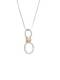

ID: 48916, Size: 0.71 KB


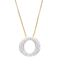

ID: 51669, Size: 0.81 KB


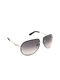


Largest File Images:
ID: 8924, Size: 107.77 KB


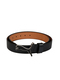

ID: 21186, Size: 82.68 KB


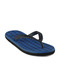

ID: 28092, Size: 72.11 KB


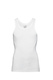

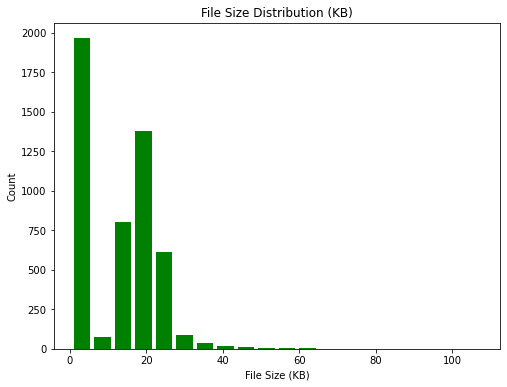

In [10]:
def analyze_file_sizes(results):
    valid_results = [r for r in results if r is not None]
    file_sizes = [r["file_size_kb"] for r in valid_results]

    # File size statistics
    print("\nFile Size Statistics:")
    print(f"Total Images: {len(file_sizes)}")
    print(f"Min Size: {min(file_sizes):.2f} KB, Max Size: {max(file_sizes):.2f} KB")
    print(f"Average Size: {sum(file_sizes)/len(file_sizes):.2f} KB")

    # Display images for small and large files
    small_files = sorted(valid_results, key=lambda x: x["file_size_kb"])[:3]
    large_files = sorted(valid_results, key=lambda x: x["file_size_kb"], reverse=True)[:3]

    print("\nSmallest File Images:")
    for result in small_files:
        print(f"ID: {result['id']}, Size: {result['file_size_kb']:.2f} KB")
        with Image.open(result["image_path"]) as img:
            display(img)

    print("\nLargest File Images:")
    for result in large_files:
        print(f"ID: {result['id']}, Size: {result['file_size_kb']:.2f} KB")
        with Image.open(result["image_path"]) as img:
            display(img)

    # Plot distribution
    plt.figure(figsize=(8, 6))
    plt.hist(file_sizes, bins=20, color="green", rwidth=0.8)
    plt.title("File Size Distribution (KB)")
    plt.xlabel("File Size (KB)")
    plt.ylabel("Count")
    plt.show()

if __name__ == "__main__":
    with ThreadPoolExecutor(max_workers=8) as executor:
        results = list(executor.map(analyze_image, image_ids[:5000]))

    analyze_file_sizes(results)


Color Mode Counts: {'RGB': 4959, 'L': 41}

Sample Images for Color Modes:

Mode: RGB
ID: 15970, Mode: RGB


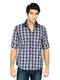

ID: 39386, Mode: RGB


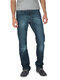

ID: 21379, Mode: RGB


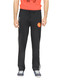


Mode: L
ID: 59263, Mode: L


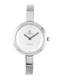

ID: 35913, Mode: L


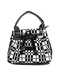

ID: 41268, Mode: L


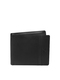

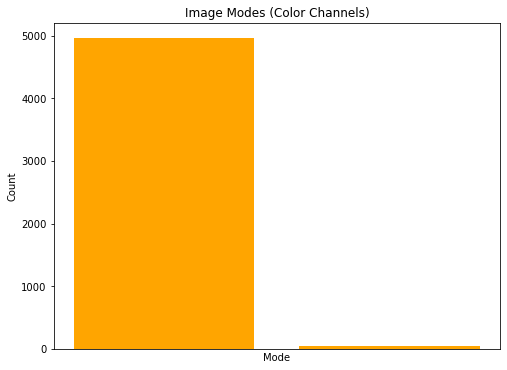

In [11]:
def analyze_color_modes(results):
    valid_results = [r for r in results if r is not None]
    modes = [r["mode"] for r in valid_results]

    # Count each mode
    mode_counts = {mode: modes.count(mode) for mode in set(modes)}
    print("Color Mode Counts:", mode_counts)

    # Display images for each mode
    print("\nSample Images for Color Modes:")
    for mode in set(modes):
        mode_samples = [r for r in valid_results if r["mode"] == mode][:3]
        print(f"\nMode: {mode}")
        for result in mode_samples:
            print(f"ID: {result['id']}, Mode: {result['mode']}")
            with Image.open(result["image_path"]) as img:
                display(img)

    # Plot distribution
    plt.figure(figsize=(8, 6))
    plt.hist(modes, bins=len(set(modes)), color="orange", rwidth=0.8)
    plt.title("Image Modes (Color Channels)")
    plt.xlabel("Mode")
    plt.ylabel("Count")
    plt.show()

if __name__ == "__main__":
    with ThreadPoolExecutor(max_workers=8) as executor:
        results = list(executor.map(analyze_image, image_ids[:5000]))

    analyze_color_modes(results)



Aspect Ratio Statistics:
Min Ratio: 0.66, Max Ratio: 1.00
Average Ratio: 0.75

Most Narrow Images:
ID: 56624, Aspect Ratio: 0.66


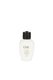

ID: 28092, Aspect Ratio: 0.66


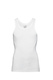

ID: 28492, Aspect Ratio: 0.66


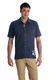


Most Wide Images:
ID: 1801, Aspect Ratio: 1.0


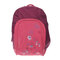

ID: 1800, Aspect Ratio: 1.0


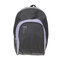

ID: 35915, Aspect Ratio: 0.8


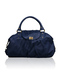

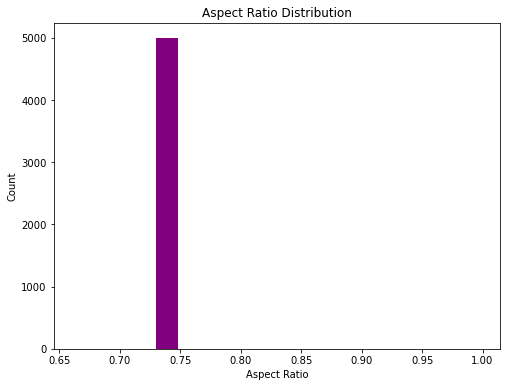

In [12]:
def analyze_aspect_ratios(results):
    valid_results = [r for r in results if r is not None]
    aspect_ratios = [r["aspect_ratio"] for r in valid_results]

    # Aspect ratio statistics
    print("\nAspect Ratio Statistics:")
    print(f"Min Ratio: {min(aspect_ratios):.2f}, Max Ratio: {max(aspect_ratios):.2f}")
    print(f"Average Ratio: {sum(aspect_ratios)/len(aspect_ratios):.2f}")

    # Display images for extreme aspect ratios
    narrow_images = sorted(valid_results, key=lambda x: x["aspect_ratio"])[:3]
    wide_images = sorted(valid_results, key=lambda x: x["aspect_ratio"], reverse=True)[:3]

    print("\nMost Narrow Images:")
    for result in narrow_images:
        print(f"ID: {result['id']}, Aspect Ratio: {result['aspect_ratio']}")
        with Image.open(result["image_path"]) as img:
            display(img)

    print("\nMost Wide Images:")
    for result in wide_images:
        print(f"ID: {result['id']}, Aspect Ratio: {result['aspect_ratio']}")
        with Image.open(result["image_path"]) as img:
            display(img)

    # Plot distribution
    plt.figure(figsize=(8, 6))
    plt.hist(aspect_ratios, bins=15, color="purple", rwidth=0.8)
    plt.title("Aspect Ratio Distribution")
    plt.xlabel("Aspect Ratio")
    plt.ylabel("Count")
    plt.show()

if __name__ == "__main__":
    with ThreadPoolExecutor(max_workers=8) as executor:
        results = list(executor.map(analyze_image, image_ids[:5000]))

    analyze_aspect_ratios(results)


In [30]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the dataset and handle bad lines
file_path = r"D:\\colabrative filtering\\archive (1)\\styles.csv"
try:
    data = pd.read_csv(file_path, quotechar='"', error_bad_lines=False, warn_bad_lines=False)
except Exception as e:
    data = pd.DataFrame()  # Create an empty DataFrame as a fallback

# Limit the number of rows to 5000
data = data.head(5000)

# Function to construct the image path
def img_path(img):
    return os.path.join(r"D:\\colabrative filtering\\archive (1)\\images\\", f"{img}.jpg")

# Function to make predictions using the model
def model_predict(model, img_name):
    # Load and preprocess image
    img = image.load_img(img_path(img_name), target_size=(224, 224))  # Resize as needed
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return model.predict(x).reshape(-1)

# Load the pre-trained VGG16 model with global max pooling
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
vgg.trainable = False
model1 = Sequential([vgg, GlobalMaxPooling2D()])

# Add a new column 'embedding' to store the extracted features for each image
embeddings = []

# Process each image from the 'id' column
for idx, img_name in enumerate(data['id']):
    try:
        embedding = model_predict(model1, img_name)
        embeddings.append(embedding)
        
        # Print a message every 1000 images processed
        if (idx + 1) % 1000 == 0:
            print(f"{idx + 1} images processed")
    except Exception as e:
        embeddings.append([None] * 512)  # Handle any issues (e.g., image not found) by appending None values

# Add embeddings as a new column
data['embedding'] = embeddings

# Save the updated DataFrame to a new CSV file
output_csv = r"D:\\colabrative filtering\\archive (1)\\styles_with_embeddings.csv"
data.to_csv(output_csv, index=False)

print(f"Embeddings saved to {output_csv}")


1/1 [==============================] - 0s 213ms/step
1000 images processed
1/1 [==============================] - 0s 247ms/step
2000 images processed
1/1 [==============================] - 0s 272ms/step
3000 images processed
1/1 [==============================] - 0s 267ms/step
4000 images processed
1/1 [==============================] - 0s 287ms/step
5000 images processed
Embeddings saved to D:\\colabrative filtering\\archive (1)\\styles_with_embeddings.csv


Shape of embeddings: (5000, 512)
Recommendations for image: 15970
Image: 8740, Similarity Score: 0.882257984802351


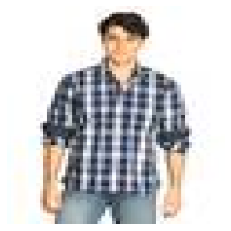

Image: 14053, Similarity Score: 0.8777541087743181


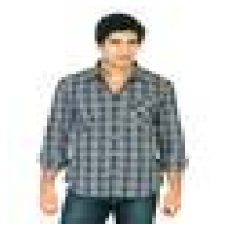

Image: 19185, Similarity Score: 0.8652025489116935


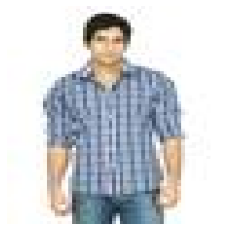

Image: 8587, Similarity Score: 0.8552183496292616


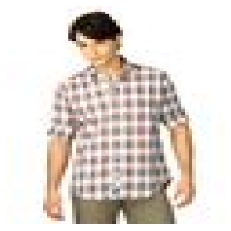

Image: 8586, Similarity Score: 0.8552183496292616


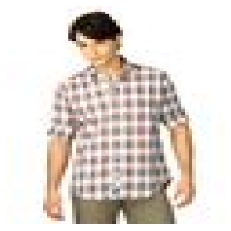

In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the dataset with embeddings
file_path = r"D:\\colabrative filtering\\archive (1)\\styles_with_embeddings.csv"
data = pd.read_csv(file_path)

# Extract the embeddings and image names
embeddings = np.array(data['embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ').astype(float)).tolist())
image_names = data['id']  # Assuming image names are in the 'id' column

# Print the shape of the embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)

# Function to get recommendations based on a given image index
def get_recommendations(image_index, top_n=5):
    # Get the cosine similarities for the given image
    similarity_scores = list(enumerate(cosine_sim[image_index]))
    
    # Sort by similarity score
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N recommendations (excluding the image itself)
    top_recommendations = sorted_scores[1:top_n+1]
    
    # Print the recommended images
    print(f"Recommendations for image: {image_names[image_index]}")
    for idx, score in top_recommendations:
        print(f"Image: {image_names[idx]}, Similarity Score: {score}")
        # Add file extension (assuming it's '.jpg')
        img_path = f"D:\\colabrative filtering\\archive (1)\\images\\{image_names[idx]}.jpg"
        try:
            # Display the image
            img = image.load_img(img_path, target_size=(224, 224))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            print(f"Image {image_names[idx]} not found at {img_path}")

# Example: Get recommendations for the first image (index 0)
get_recommendations(0, top_n=5)


1/1 [==============================] - 0s 251ms/step
Shape of embeddings: (1000, 512)
Recommendations for image: 15970
Image: 8587, Similarity Score: 0.8552181720733643


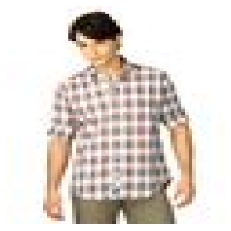

Image: 8741, Similarity Score: 0.8452789783477783


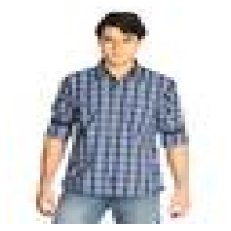

Image: 16395, Similarity Score: 0.8448307514190674


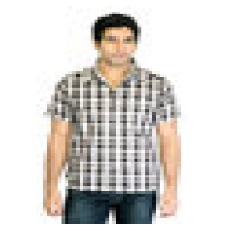

Image: 9651, Similarity Score: 0.8424981236457825


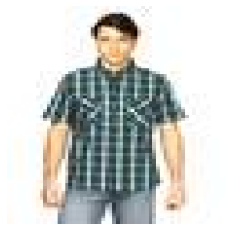

Image: 7156, Similarity Score: 0.8421610593795776


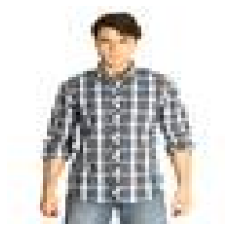

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

# Load the dataset with embeddings
file_path = r"D:\\colabrative filtering\\archive (1)\\styles_with_embeddings.csv"
data = pd.read_csv(file_path)

# Select the first 1000 rows for processing
data = data.head(1000)

# Load the pre-trained VGG16 model with global max pooling
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
vgg.trainable = False
model = Sequential([vgg, GlobalMaxPooling2D()])

# Function to process images and get embeddings
def get_vgg_embedding(model, img_name):
    img_path = f"D:\\colabrative filtering\\archive (1)\\images\\{img_name}.jpg"
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        embedding = model.predict(x).reshape(-1)
        return embedding
    except FileNotFoundError:
        print(f"Image {img_name} not found at {img_path}")
        return np.zeros((512,))

# Generate embeddings for the first 1000 images
embeddings = []
for img_name in data['id']:
    embedding = get_vgg_embedding(model, img_name)
    embeddings.append(embedding)

embeddings = np.array(embeddings)

# Print the shape of the embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)

# Function to get recommendations based on a given image index
def get_recommendations(image_index, top_n=5):
    # Get the cosine similarities for the given image
    similarity_scores = list(enumerate(cosine_sim[image_index]))
    
    # Sort by similarity score
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N recommendations (excluding the image itself)
    top_recommendations = sorted_scores[1:top_n+1]
    
    # Print the recommended images
    print(f"Recommendations for image: {data['id'][image_index]}")
    for idx, score in top_recommendations:
        print(f"Image: {data['id'][idx]}, Similarity Score: {score}")
        img_path = f"D:\\colabrative filtering\\archive (1)\\images\\{data['id'][idx]}.jpg"
        try:
            # Display the image
            img = image.load_img(img_path, target_size=(224, 224))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            print(f"Image {data['id'][idx]} not found at {img_path}")

# Example: Get recommendations for the first image (index 0)
get_recommendations(0, top_n=5)


1/1 [==============================] - 0s 197ms/step
Shape of embeddings: (1000, 1024)
Recommendations for image: 15970
Image: 16395, Similarity Score: 0.9384700059890747


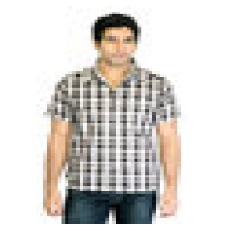

Image: 8741, Similarity Score: 0.9011924266815186


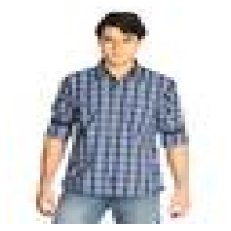

Image: 16530, Similarity Score: 0.897004246711731


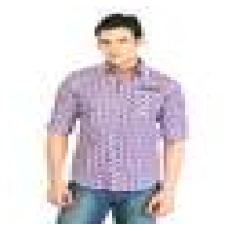

Image: 24065, Similarity Score: 0.8912138938903809


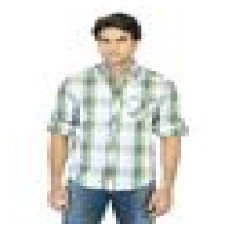

Image: 14055, Similarity Score: 0.888765811920166


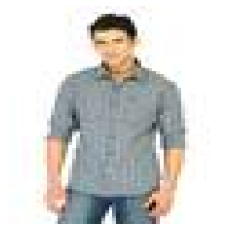

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.densenet import preprocess_input
import matplotlib.pyplot as plt

# Load the dataset with embeddings
file_path = r"D:\\colabrative filtering\\archive (1)\\styles_with_embeddings.csv"
data = pd.read_csv(file_path)

# Select the first 1000 rows for processing
data = data.head(1000)

# Load the pre-trained DenseNet121 model with global max pooling
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
densenet.trainable = False
model = Sequential([densenet, GlobalMaxPooling2D()])

# Function to process images and get embeddings
def get_densenet_embedding(model, img_name):
    img_path = f"D:\\colabrative filtering\\archive (1)\\images\\{img_name}.jpg"
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        embedding = model.predict(x).reshape(-1)
        return embedding
    except FileNotFoundError:
        print(f"Image {img_name} not found at {img_path}")
        return np.zeros((1024,))

# Generate embeddings for the first 1000 images
embeddings = []
for img_name in data['id']:
    embedding = get_densenet_embedding(model, img_name)
    embeddings.append(embedding)

embeddings = np.array(embeddings)

# Print the shape of the embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)

# Function to get recommendations based on a given image index
def get_recommendations(image_index, top_n=5):
    # Get the cosine similarities for the given image
    similarity_scores = list(enumerate(cosine_sim[image_index]))
    
    # Sort by similarity score
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N recommendations (excluding the image itself)
    top_recommendations = sorted_scores[1:top_n+1]
    
    # Print the recommended images
    print(f"Recommendations for image: {data['id'][image_index]}")
    for idx, score in top_recommendations:
        print(f"Image: {data['id'][idx]}, Similarity Score: {score}")
        img_path = f"D:\\colabrative filtering\\archive (1)\\images\\{data['id'][idx]}.jpg"
        try:
            # Display the image
            img = image.load_img(img_path, target_size=(224, 224))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            print(f"Image {data['id'][idx]} not found at {img_path}")

# Example: Get recommendations for the first image (index 0)
get_recommendations(0, top_n=5)


1/1 [==============================] - 0s 71ms/step
Shape of embeddings: (1000, 1024)
Recommendations for image: 15970
Image: 16395, Similarity Score: 0.9143033623695374


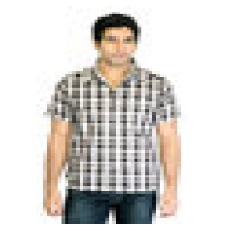

Image: 8741, Similarity Score: 0.8852233290672302


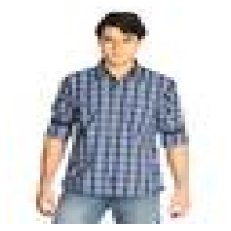

Image: 8587, Similarity Score: 0.8754480481147766


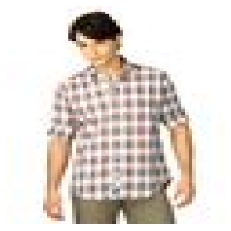

Image: 22350, Similarity Score: 0.8727076053619385


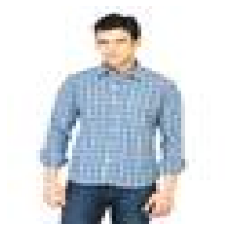

Image: 9651, Similarity Score: 0.865161120891571


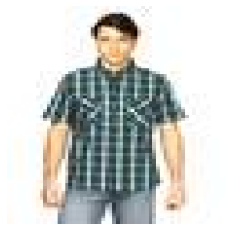

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt

# Load the dataset with embeddings
file_path = r"D:\\colabrative filtering\\archive (1)\\styles_with_embeddings.csv"
data = pd.read_csv(file_path)

# Select the first 1000 rows for processing
data = data.head(1000)

# Load the pre-trained MobileNet model with global max pooling
mobilenet = MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
mobilenet.trainable = False
model = Sequential([mobilenet, GlobalMaxPooling2D()])

# Function to process images and get embeddings
def get_mobilenet_embedding(model, img_name):
    img_path = f"D:\\colabrative filtering\\archive (1)\\images\\{img_name}.jpg"
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        embedding = model.predict(x).reshape(-1)
        return embedding
    except FileNotFoundError:
        print(f"Image {img_name} not found at {img_path}")
        return np.zeros((1024,))

# Generate embeddings for the first 1000 images
embeddings = []
for img_name in data['id']:
    embedding = get_mobilenet_embedding(model, img_name)
    embeddings.append(embedding)

embeddings = np.array(embeddings)

# Print the shape of the embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)

# Function to get recommendations based on a given image index
def get_recommendations(image_index, top_n=5):
    # Get the cosine similarities for the given image
    similarity_scores = list(enumerate(cosine_sim[image_index]))
    
    # Sort by similarity score
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N recommendations (excluding the image itself)
    top_recommendations = sorted_scores[1:top_n+1]
    
    # Print the recommended images
    print(f"Recommendations for image: {data['id'][image_index]}")
    for idx, score in top_recommendations:
        print(f"Image: {data['id'][idx]}, Similarity Score: {score}")
        img_path = f"D:\\colabrative filtering\\archive (1)\\images\\{data['id'][idx]}.jpg"
        try:
            # Display the image
            img = image.load_img(img_path, target_size=(224, 224))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            print(f"Image {data['id'][idx]} not found at {img_path}")

# Example: Get recommendations for the first image (index 0)
get_recommendations(0, top_n=5)
